In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/vera0519/vera_911')
import pandas as pd
# import cenpy
import src.features.call_types as call_types
from src.cities.new_orleans import NewOrleans
from src.cities.seattle import Seattle
from src.cities.dallas import Dallas
from src.cities.detroit import Detroit
from src.cities.charleston import Charleston
import matplotlib.pyplot as plt
import src.features.geo as Geo
from src.features.call_types import load_call_mappings, assign_disposition, process
import src.visualization.visualize as vis
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: No module named 'dotenv'

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/vera0519/vera_911')
from src.cities.new_orleans import NewOrleans
from src.cities.seattle import Seattle
from src.cities.dallas import Dallas
from src.cities.detroit import Detroit
from src.cities.charleston import Charleston
import pandas as pd 
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: No module named 'dotenv'

In [43]:
def plot_call_volme_by_CFS_by_self_initiated(city, call_type=None, ax=None):
    try:
        if(not ax):
            fig = plt.figure()
            ax = fig.add_subplot(111)
        
        if (call_type == None) :
            data = city.clean_data().groupby(['year', 'self_initiated']).count().reset_index()
            data[['year']] = data[['year']].astype(int)
            data = data.pivot_table(index='year', columns='self_initiated', values='index')
        else :
            data = city.clean_data().groupby(['year', 'self_initiated', 'call_type']).count().reset_index()
            data[['year']] = data[['year']].astype(int)
            data = data.pivot_table(index=['call_type', 'year'], columns='self_initiated', values='index').loc[call_type]
        if (city.name() == 'Charleston' or city.name() == 'Dallas') :
            data = data.assign(unknown = lambda x :  x.unknown/1000)
            data.plot(kind='barh', stacked=True, label='Self Initiated',ax=ax, colors=['#D1D4C9'])
            ax.legend(['N/A'],loc='lower right')
        if (city.name() == 'NewOrleans') :
            data = data.assign(No = lambda x :  x.No/1000, Yes = lambda x :  x.Yes/1000, other = lambda x :  x.other/1000 )
            data.plot(kind='barh', stacked=True, label='Self Initiated',ax=ax, colors=['#159BA3','#F9BA16','#D1D4C9'])
            ax.legend(['Non self initiated', 'Self initiated','N/A'],loc='lower left')
        if (city.name() == 'Detroit' or city.name() == 'Seattle') :
            data = data.assign(No = lambda x :  x.No/1000, Yes = lambda x :  x.Yes/1000 )
            data.plot(kind='barh', stacked=True, label='Self Initiated',ax=ax, colors=['#159BA3','#F9BA16','#D1D4C9'])
            ax.legend(['Non self initiated', 'Self initiated','N/A'],loc='lower right')
        ax.set_xlabel('Number of Calls (thousands)')
        ax.set_ylabel('')
        ax.set_title('Number of calls - '+ ('all CFS types' if call_type == None else call_type))
    except:
        show_no_self_initiated_error(ax)
    
    return ax

CFS_codes = [None, 'Accidents/Traffic Safety', 'Alarms', 'Assisting the Public',  'Behavioral Health', 'Call Related Issues', 
'Callback', 'Complaints/Environmental Conditions', 'Domestic Violence', 'Drugs', 'Fire', 'Liquor Violations', 
'Medical Emergencies',  'Missing Persons', 'Officer Needs Help', 'Other (Not Crime)', 'Other Crimes', 'Property Crime',  
'Sex Offenses', 'Status Offenses', 'Statuses', 'Suspicion', 'Training Academy', 'Violent Crime', 'Warrants', 'other']

In [44]:
city = Detroit()

[04:24:43.794 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



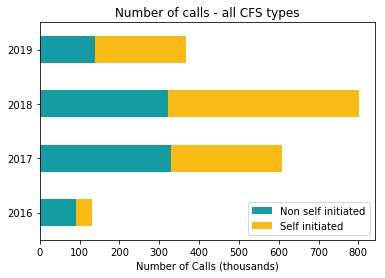

In [45]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[0])

[04:24:44.759 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



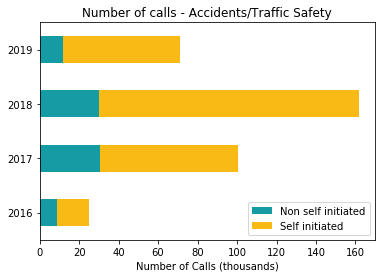

In [46]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[1])

[04:24:46.242 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



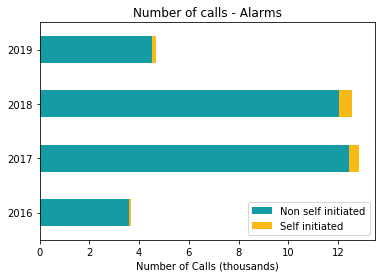

In [47]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[2])

NameError: name 'show_no_self_initiated_error' is not defined

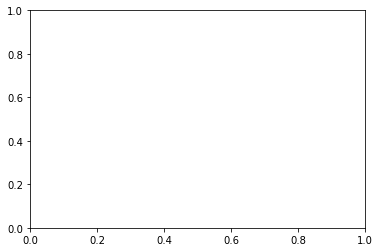

In [48]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[3])

[04:25:18.103 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



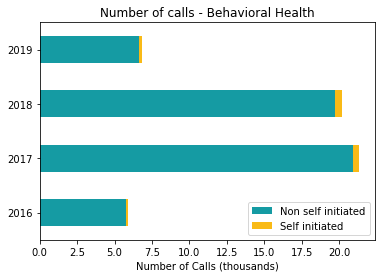

In [60]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[4])

NameError: name 'show_no_self_initiated_error' is not defined

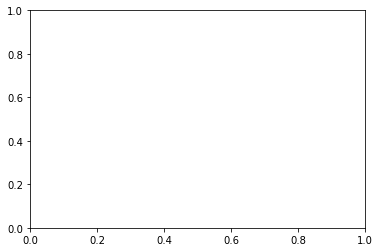

In [61]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[5])

[04:25:28.945 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



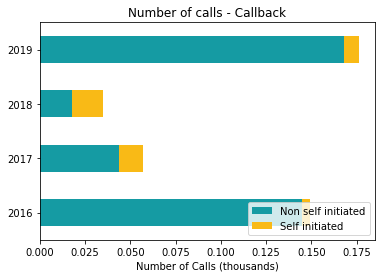

In [65]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[6])

[04:25:20.473 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



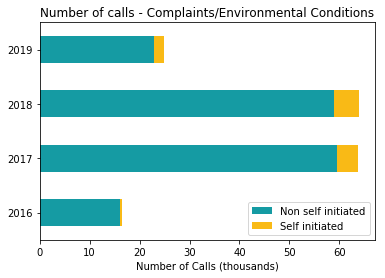

In [62]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[7])

[04:25:22.027 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



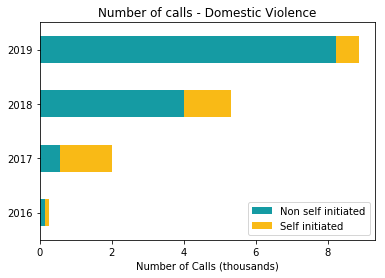

In [63]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[8])

[04:25:23.584 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



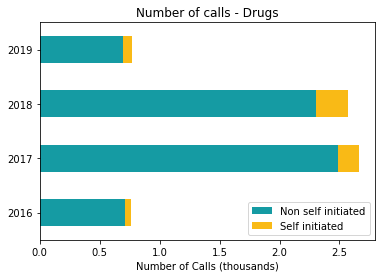

In [64]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[9])

[04:24:48.699 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



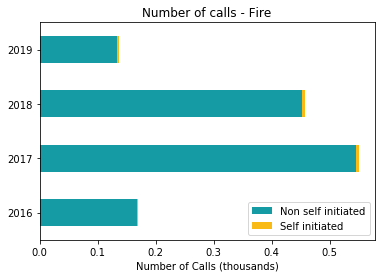

In [49]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[10])

NameError: name 'show_no_self_initiated_error' is not defined

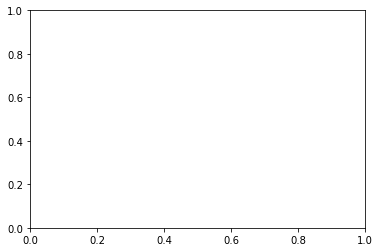

In [50]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[11])

[04:30:25.417 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



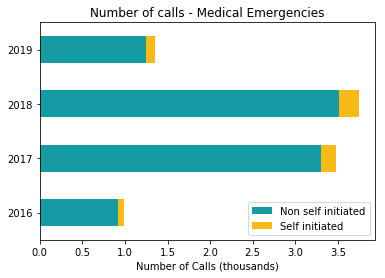

In [66]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[12])

[04:30:26.489 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



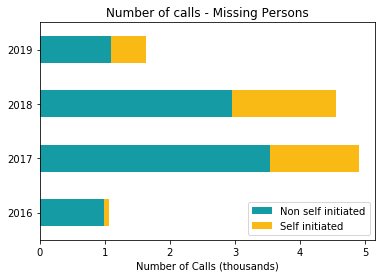

In [67]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[13])

NameError: name 'show_no_self_initiated_error' is not defined

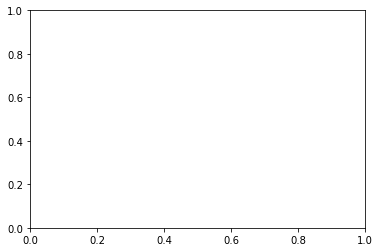

In [51]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[14])

[04:31:39.043 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



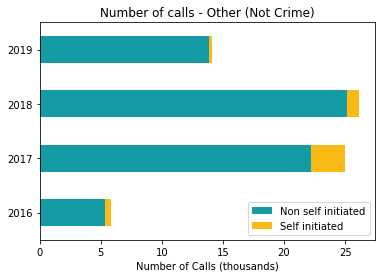

In [68]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[15])

[04:31:39.969 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



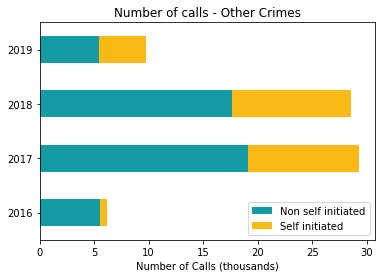

In [69]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[16])

NameError: name 'show_no_self_initiated_error' is not defined

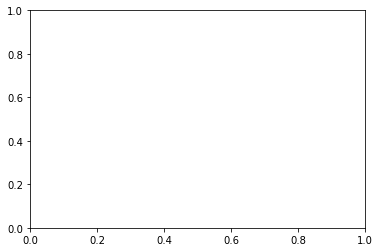

In [52]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[17])

[04:32:28.656 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



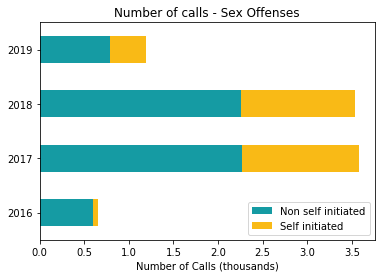

In [70]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[18])

[04:24:53.213 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



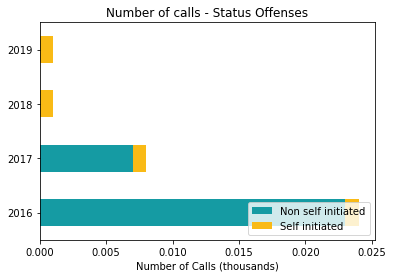

In [53]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[19])

[04:24:54.075 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



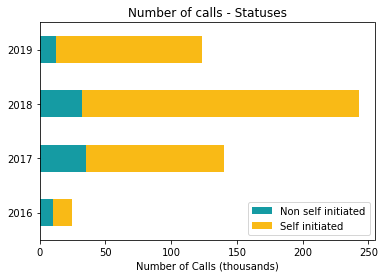

In [54]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[20])

[04:24:54.932 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



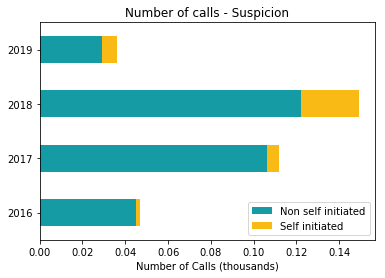

In [55]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[21])

NameError: name 'show_no_self_initiated_error' is not defined

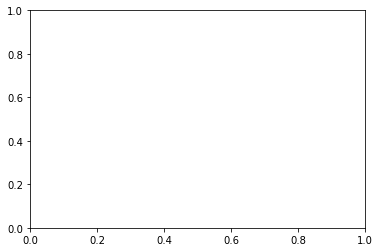

In [56]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[22])

[04:25:04.594 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



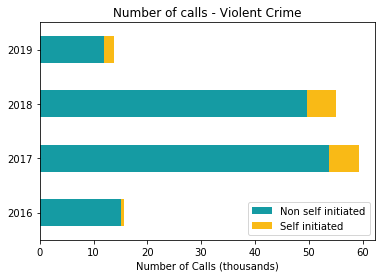

In [57]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[23])

[04:25:05.546 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



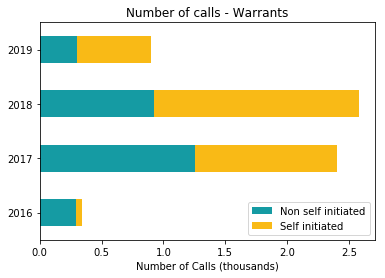

In [58]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[24])

[04:25:06.595 WARNING] /home/tsdataclinic/.conda/envs/dataclinic/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



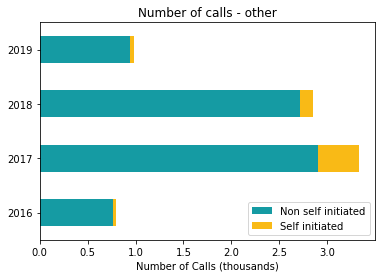

In [59]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[25])